Sei $S=[0,10]\times \{0\} \subset \mathbb{R}^2$ ein Eisenbahnabschnitt. Dazu einige Bedarfspunkte (H&auml;user) $P$: 

$$P= \{ (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1),(0, -\frac{1}{2}), (2, -1), (4, -\frac{3}{2}), (6, -1), (8, -1/2), (10, -\frac{1}{2}) \} $$

Die Menschen, die in den H&auml;usern leben sind in der Lage $r=1,5$ L&auml;ngeneinheiten weit zu laufen. Gesucht ist eine m&ouml;glichst minimale Zahl von Bahnh&ouml;fen auf dem Eisenbahnabschnitt, sodass alle Menschen zu einem Bahnhof kommen k&ouml;nnen.  

* Schreibe eine Funktion, die die Eisenbahnlinie zusammen mit den Bedarfspunkten zeichnet.
* Bestimme eine endliche Kandidatenmenge von Positionen auf dem Gleis, an denen es sinnvoll w&auml;re Bahnh&ouml;fe zu bauen. <em>Hinweis: So eine Kandidatenmenge besteht aus allen Schnittpunkten des Schienennetz mit Kreisen um die Bedarfspunkte mit Radius $r$ und den Randpunkten der Schiene. (warum?)</em>
* Nutze die M&ouml;glichkeiten der Sageklasse ```MixedIntegerLinearProgramm```um aus dieser endlichen Kandidatenmenge eine Optimalpositionierung auszuw&auml;hlen. <em>Hinweise:</em><ol>
* Sei $A(i,j)= 1$ falls das Haus $i$ vom Bahnhofskandidaten $j$ abgedeckt wird und $0$ sonst.
* Erstelle boolsche Variablen $x_i$ die 1 sind falls Kandidat $i$ gebaut wird.
* Minimiere $\sum x_i$ sodass folgende Bedingungen erf&uuml;llt sind: $\sum_j x_j \cdot A(i,j) \geq 1 \quad \forall i \in P$

* Zeichne die Einzugsbereiche der so gebauten Bahnh&ouml;fe zus&auml;tzlich zu dem unter 1.) erstelltem Plot ein.
* Nach Einnahme von Energy Drinks k&ouml;nnen die Anwohner 0,25 L&auml;ngeneinheiten weiter laufen. Spart das Bahnh&ouml;fe ein?


In [1]:
def draw(M,col):       #Nur eine Zeichenfunktion
    D=point((0,0))+point((10,0))
    for n in M:
        D += point((n[0],n[1]),color=col)    
    return D

In [2]:
def give_candidates(Bedarf,r):
    K = Set([])
    for P in Bedarf:
        if r>=abs(P[1]): #Sonst imaginäre Lösungen 
            # Einige zusätzliche Kandidaten um numerische Rundungsfehler abzufedern
            K = K + Set([(P[0]+sqrt(r^2-P[1]^2).n(),0)])
            K = K + Set([(P[0]+sqrt(r^2-P[1]^2).n()+0.01,0)])
            K = K + Set([(P[0]+sqrt(r^2-P[1]^2).n()-0.01,0)])
            K = K + Set([(P[0]-sqrt(r^2-P[1]^2).n(),0)])
            K = K + Set([(P[0]-sqrt(r^2-P[1]^2).n()+0.01,0)])
            K = K + Set([(P[0]-sqrt(r^2-P[1]^2).n()-0.01,0)])
    R=Set([])
    for k in K:   # Elemente am Ende der Schiene löschen
        if k[0]>=0 and k[0]<=10:
            R += Set([k])
    return list(R)

In [3]:
def dist(a,b):
    return sqrt((a[0]-b[0])^2+(a[1]-b[1])^2).n()

In [4]:
def covers(Ba,Be,r):
    if dist(Ba,Be) <= r:
        return 1
    return 0

In [5]:
def place(Haeuser,r,image):
    Kandidaten=give_candidates(Haeuser,r)
    if image:
        (draw(Kandidaten,"blue")+draw(B,"red")).show(aspect_ratio=true) #Kandidatenmenge zeichen
    s = MixedIntegerLinearProgram(maximization=false)
    x= s.new_variable(binary=true)    # Boolsche Variablen
    s.set_objective(sum([x[i] for i in range(len(Kandidaten))])) # zu minimierende Zielfunktion
    #Nebenbedingungen hinzufügen
    for Haus in Haeuser:
        s.add_constraint(sum([covers(Haus,Kandidaten[j],r)*x[j] for j in range(len(Kandidaten))]) >= 1)
    skip=false    
    try:
        s.solve()  #Lösen
    except:
        print "nicht lösbar"
        skip = true
    if not skip:
        Wahl=s.get_values(x)
        Bau=[]
        for s in Wahl:
            if Wahl[s]==1:
                Bau += [s]
        print "Gebaut werden sollten: "
        for b in Bau:
            print Kandidaten[b]
        if image:   # Lösung zeichnen
            p=point((0,0))           
            for i in Bau:
                p+=circle(Kandidaten[i],r,edgecolor="green")
            (draw(Kandidaten,"blue")+draw(B,"red")+draw([Kandidaten[i] for i in Bau],"green")+p).show(aspect_ratio=true)

In [6]:
B=[(i,1) for i in [1..9]];
B += [(0,-1/2),(2,-1),(4,-3/2),(6,-1),(8,-1/2),(10,-1/2)]
B

[(1, 1),
 (2, 1),
 (3, 1),
 (4, 1),
 (5, 1),
 (6, 1),
 (7, 1),
 (8, 1),
 (9, 1),
 (0, -1/2),
 (2, -1),
 (4, -3/2),
 (6, -1),
 (8, -1/2),
 (10, -1/2)]

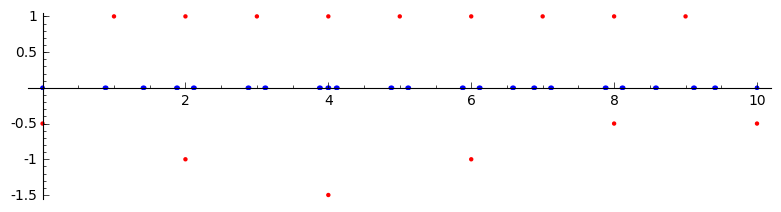

Gebaut werden sollten: 
(4.00000000000000, 0)
(9.40421356237310, 0)
(1.40421356237310, 0)
(7.11803398874989, 0)


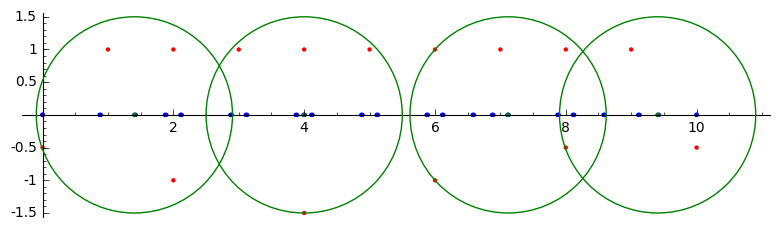

In [7]:
place(B,1.5,true)

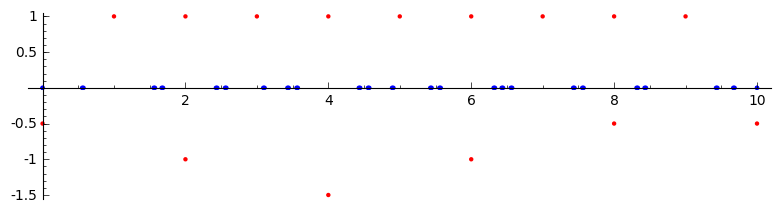

Gebaut werden sollten: 
(8.42614066163451, 0)
(4.57385933836549, 0)
(1.56385933836549, 0)


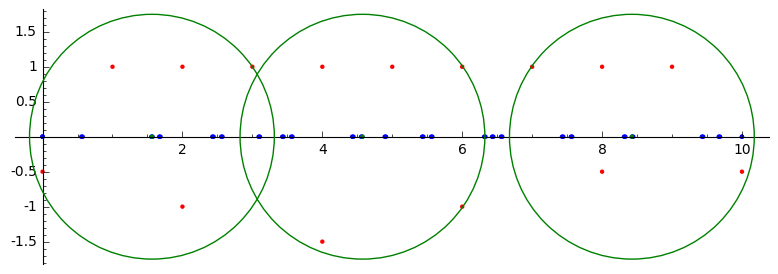

In [8]:
place(B,1.5+0.25,true)